<a href="https://colab.research.google.com/github/mairovitzmario/data_science_notebooks/blob/main/personality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Download libraries

In [ ]:
! pip install -q kaggle

# 1. Load Kaggle data

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes


In [ ]:
!kaggle datasets download "rakeshkapilavai/extrovert-vs-introvert-behavior-data"

Dataset URL: https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data
License(s): CC-BY-SA-4.0
extrovert-vs-introvert-behavior-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/extrovert-vs-introvert-behavior-data.zip

Archive:  /content/extrovert-vs-introvert-behavior-data.zip
replace personality_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import pandas as pd

df = pd.read_csv('/content/personality_dataset.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# 2. Cleaning & Preprocessing

Let's convert the data to numbers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [ ]:
df['Stage_fear'] = df['Stage_fear'].map({'No': 0, 'Yes': 1,})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'No': 0, 'Yes': 1,})
df['Personality'] = df['Personality'].map({'Introvert': 0, 'Extrovert': 1,})
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,1
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,0
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,0
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,1
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,1


Let's visualize the data

In [ ]:
df.describe()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2837.000000,2827.000000,2838.000000,2834.000000,2848.000000,2823.000000,2835.000000,2900.000000
mean,4.505816,0.498762,3.963354,3.000000,0.494031,6.268863,3.564727,0.514138
std,3.479192,0.500087,2.903827,2.247327,0.500052,4.289693,2.926582,0.499886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,4.000000,0.000000,3.000000,3.000000,0.000000,5.000000,3.000000,1.000000
75%,8.000000,1.000000,6.000000,5.000000,1.000000,10.000000,6.000000,1.000000
max,11.000000,1.000000,10.000000,7.000000,1.000000,15.000000,10.000000,1.000000


array([[<Axes: title={'center': 'Time_spent_Alone'}>,
        <Axes: title={'center': 'Stage_fear'}>,
        <Axes: title={'center': 'Social_event_attendance'}>],
       [<Axes: title={'center': 'Going_outside'}>,
        <Axes: title={'center': 'Drained_after_socializing'}>,
        <Axes: title={'center': 'Friends_circle_size'}>],
       [<Axes: title={'center': 'Post_frequency'}>,
        <Axes: title={'center': 'Personality'}>, <Axes: >]], dtype=object)

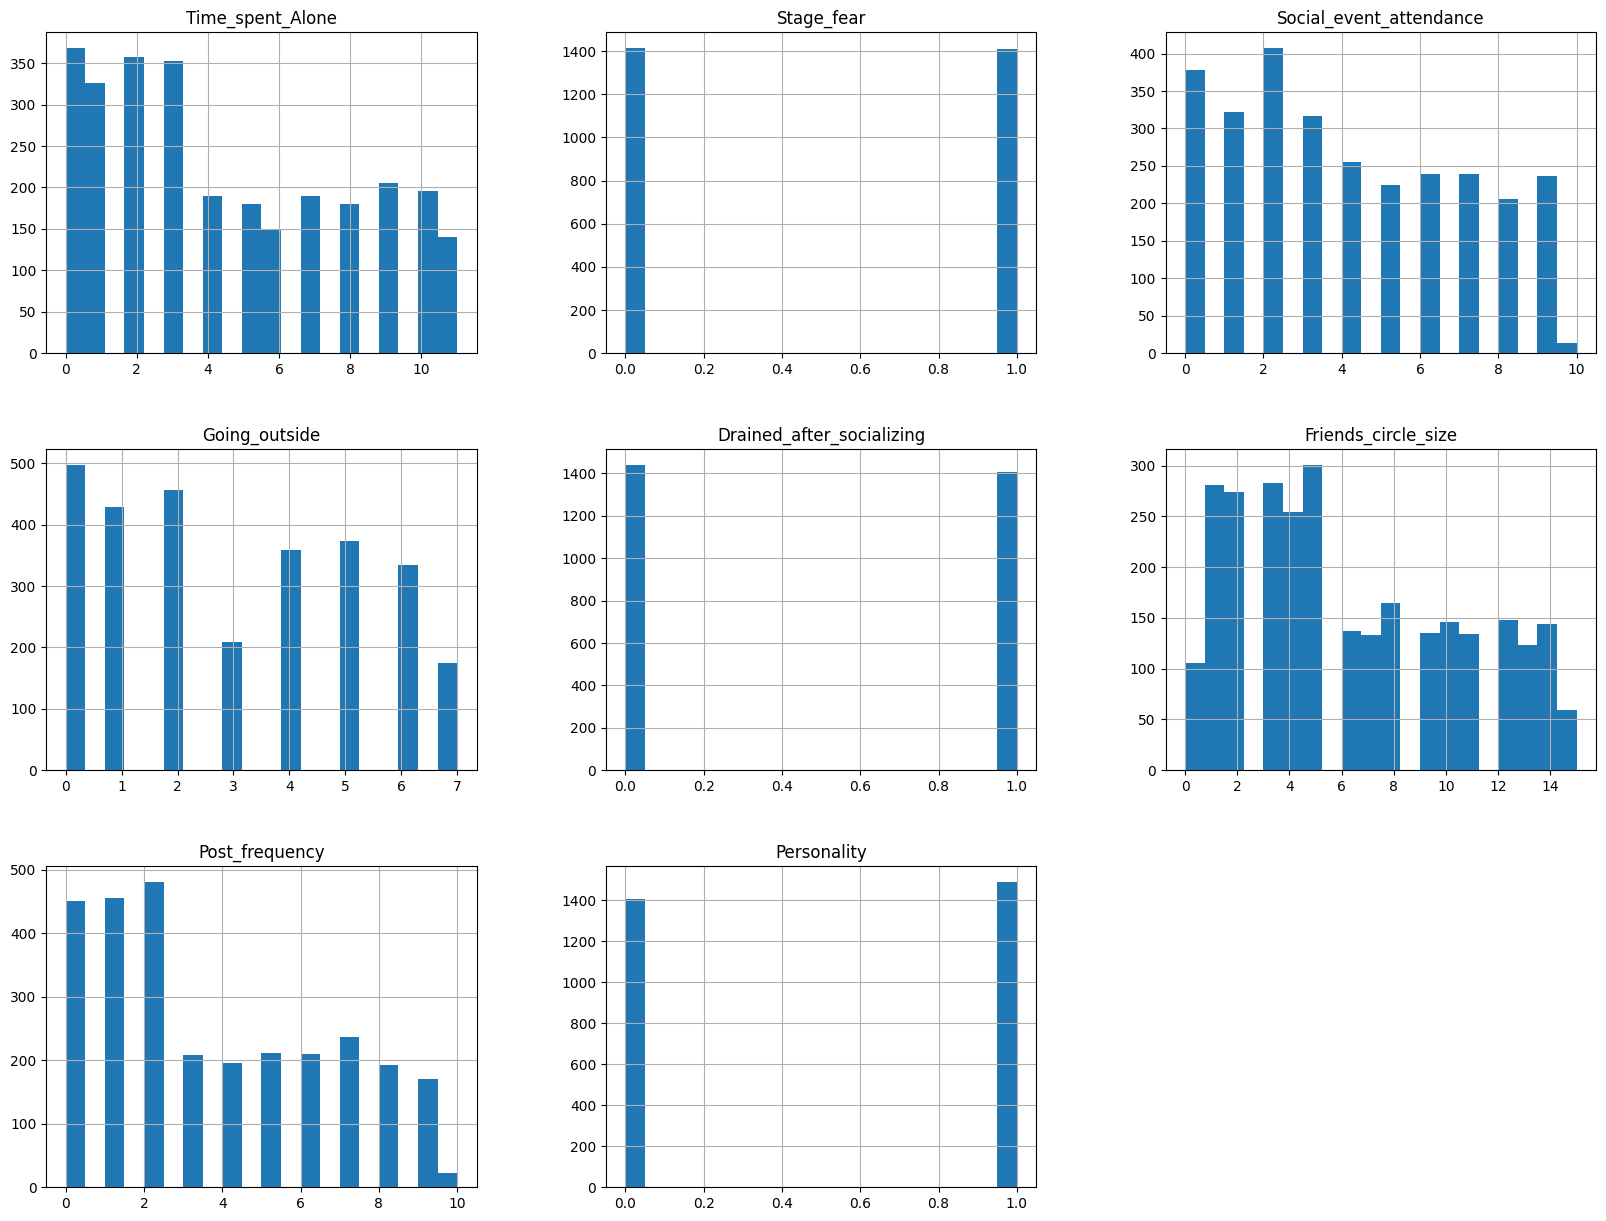

In [ ]:
df.hist(bins=20, figsize=(20,15))

In [ ]:
print('introverts with stage fear:',len(df[(df['Personality'] == 0) & (df['Stage_fear'] == 1)]))
print('extroverts with stage fear:',len(df[(df['Personality'] == 1) & (df['Stage_fear'] == 1)]))


introverts with stage fear: 1299
extroverts with stage fear: 111


In [ ]:
print('introverts drained after socializing:', len(df[(df['Personality'] == 0) & (df['Drained_after_socializing'] == 1)]))
print('extroverts drained after socializing:', len(df[(df['Personality'] == 1) & (df['Drained_after_socializing'] == 1)]))


introverts drained after socializing: 1296
extroverts drained after socializing: 111


In [ ]:
df[df['Personality']==1].describe()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,1457.000000,1449.000000,1463.000000,1456.000000,1473.000000,1451.000000,1458.000000,1491.0
mean,2.067261,0.076605,6.016405,4.634615,0.075356,9.173673,5.638546,1.0
std,2.208781,0.266055,2.211710,1.593288,0.264055,3.501944,2.341549,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1.000000,0.000000,4.000000,4.000000,0.000000,7.000000,4.000000,1.0
50%,2.000000,0.000000,6.000000,5.000000,0.000000,9.000000,6.000000,1.0
75%,3.000000,0.000000,8.000000,6.000000,0.000000,12.000000,7.000000,1.0
max,11.000000,1.000000,10.000000,7.000000,1.000000,15.000000,10.000000,1.0


In [ ]:
df[df['Personality']==0].describe()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,1380.000000,1378.000000,1375.000000,1378.000000,1375.000000,1372.000000,1377.000000,1409.0
mean,7.080435,0.942671,1.778909,1.272859,0.942545,3.196793,1.368918,0.0
std,2.612803,0.232555,1.715328,1.377642,0.232794,2.555706,1.566034,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,5.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0
50%,7.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.0
75%,9.000000,1.000000,3.000000,2.000000,1.000000,4.000000,2.000000,0.0
max,11.000000,1.000000,9.000000,7.000000,1.000000,14.000000,9.000000,0.0


Let's deal with the missing values

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
Friends_circle_size,77
Stage_fear,73
Going_outside,66
Post_frequency,65
Time_spent_Alone,63
Social_event_attendance,62
Drained_after_socializing,52
Personality,0


In [ ]:
(len(df) - len(df.dropna()))/len(df)

0.14586206896551723

Since the data looks skewed, we will replace NaN's with the median

In [ ]:
cols_to_impute = [
    "Friends_circle_size",
    "Going_outside",
    "Post_frequency",
    "Time_spent_Alone",
    "Social_event_attendance",
]

for col in cols_to_impute:
    df[col] = df[col].fillna(df[col].median())

For the "stage fear" and "drained after socializing" columns, we will replace the missing values with new values based on the target variable, since there is a high correlation between these 2 variables and the target variable

In [ ]:
cols_to_impute = [
    'Drained_after_socializing',
    'Stage_fear'
]
target_col = 'Personality'

for col in cols_to_impute:
    medians = df.groupby(target_col)[col].median()
    def impute_row(row):
        if pd.isna(row[col]):
            return medians.loc[row[target_col]]
        else:
            return row[col]
    df[col] = df.apply(impute_row, axis=1)

In [ ]:
df.describe()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.494828,0.496897,3.942759,3.000000,0.496897,6.235172,3.552069,0.514138
std,3.441971,0.500077,2.875987,2.221597,0.500077,4.237255,2.894794,0.499886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,4.000000,0.000000,3.000000,3.000000,0.000000,5.000000,3.000000,1.000000
75%,7.000000,1.000000,6.000000,5.000000,1.000000,10.000000,6.000000,1.000000
max,11.000000,1.000000,10.000000,7.000000,1.000000,15.000000,10.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   float64
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   float64
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 181.4 KB


array([[<Axes: title={'center': 'Time_spent_Alone'}>,
        <Axes: title={'center': 'Stage_fear'}>,
        <Axes: title={'center': 'Social_event_attendance'}>],
       [<Axes: title={'center': 'Going_outside'}>,
        <Axes: title={'center': 'Drained_after_socializing'}>,
        <Axes: title={'center': 'Friends_circle_size'}>],
       [<Axes: title={'center': 'Post_frequency'}>,
        <Axes: title={'center': 'Personality'}>, <Axes: >]], dtype=object)

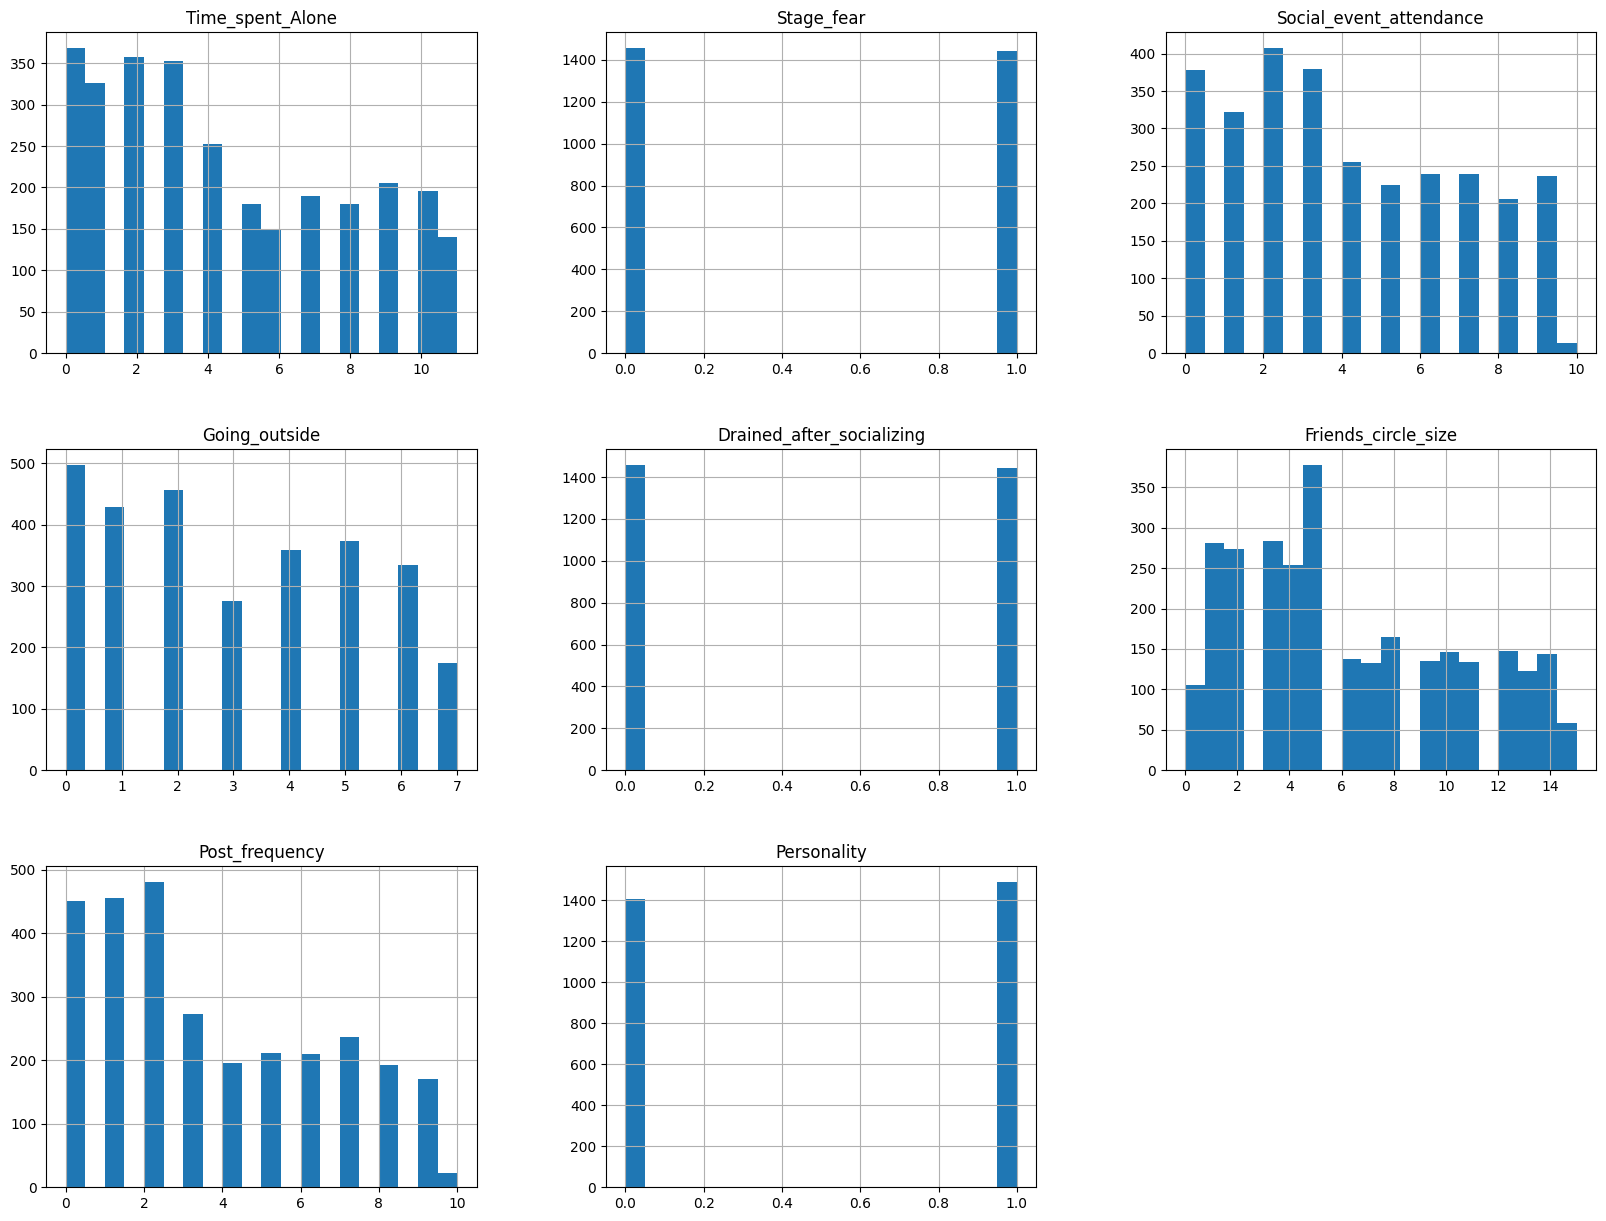

In [ ]:
df.hist(bins=20, figsize=(20,15))

# 3. Prediction

## 3.0 Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns=['Personality'])
y = df['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3.1 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)
lr_score = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {lr_score:.4f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9293
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       278
           1       0.94      0.92      0.93       302

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



## 3.2 Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test)
dt_score = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {dt_score:.4f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.8793
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       278
           1       0.91      0.86      0.88       302

    accuracy                           0.88       580
   macro avg       0.88      0.88      0.88       580
weighted avg       0.88      0.88      0.88       580



## 3.3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)
rf_score = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {rf_score:.4f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9241
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       278
           1       0.94      0.92      0.93       302

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



## 3.4 Comparison

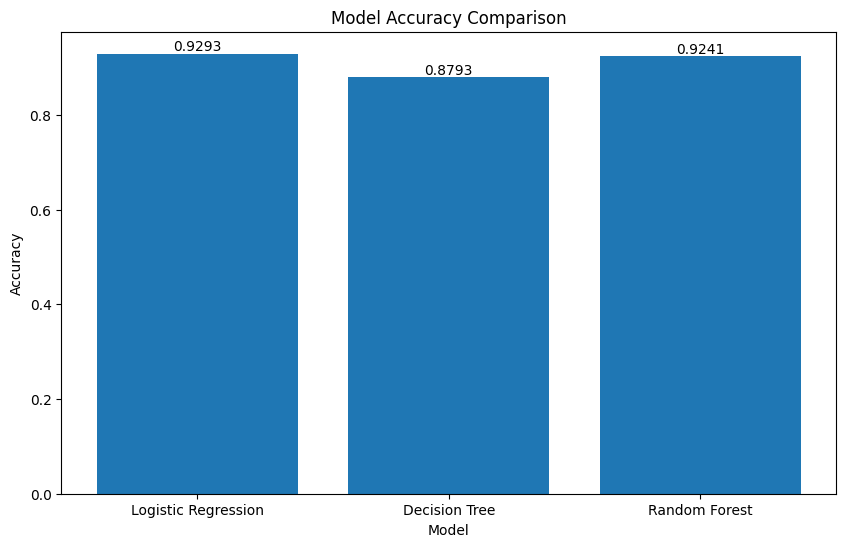

In [ ]:
import matplotlib.pyplot as plt

scores = {
    'Logistic Regression': lr_score,
    'Decision Tree': dt_score,
    'Random Forest': rf_score
}

plt.figure(figsize=(10, 6))
bars = plt.bar(scores.keys(), scores.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Add the actual values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', va='bottom', ha='center') # va: vertical alignment, ha: horizontal alignment

plt.show()

In [ ]:
max_score = max(scores.values())
print(f'Score to beat: {max_score:.4f}')

Score to beat: 0.9293


## 3.5 Neural Network

In [ ]:
X_train.shape

(2320, 7)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

num_features = X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(num_features,)),
    layers.Dense(256, activation='relu'),\
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,313 (177.00 KB)

 Trainable params: 45,313 (177.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8304 - loss: 0.4275 - val_accuracy: 0.9547 - val_loss: 0.2171
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9290 - loss: 0.3065 - val_accuracy: 0.9547 - val_loss: 0.2105
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9430 - loss: 0.2581 - val_accuracy: 0.9547 - val_loss: 0.2048
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9268 - loss: 0.2874 - val_accuracy: 0.9547 - val_loss: 0.2353
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9217 - loss: 0.2839 - val_accuracy: 0.9547 - val_loss: 0.2071
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9405 - loss: 0.2458 - val_accuracy: 0.9547 - val_loss: 0.2148
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9302 - loss: 0.2659 - val_accuracy: 0.9547 - val_loss: 0.1946
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9360 - loss: 0.2410 - val_accuracy: 0.9547 - val_loss:

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

Test Accuracy: 0.9293
Test Loss: 0.2640


In [ ]:
accuracy > max_score

False

In [ ]:
import numpy as np

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()
y_test_array = np.array(y_test).flatten()

results = pd.DataFrame({
    'True': y_test_array,
    'Predicted': y_pred
}).reset_index(drop=True)

X_test_df = pd.DataFrame(X_test, columns=X.columns).reset_index(drop=True)

results = pd.concat([X_test_df, results], axis=1)
wrong = results[results['True'] != results['Predicted']]

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
wrong.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,True,Predicted
15,7.0,1.0,3.0,0.0,1.0,3.0,0.0,1,0
17,1.0,0.0,6.0,7.0,0.0,13.0,7.0,0,1
38,0.0,0.0,7.0,7.0,0.0,11.0,6.0,0,1
45,8.0,1.0,0.0,0.0,1.0,2.0,1.0,1,0
52,1.0,0.0,7.0,5.0,0.0,14.0,8.0,0,1
